In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


# 1) Pre-Processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.shape

(200000, 9)

In [6]:
df.isnull()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False


In [7]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [8]:
df.drop(columns=['Unnamed: 0','key'],inplace=True)

In [9]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [11]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [14]:
df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean(),inplace=True)
df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean(),inplace=True)

In [15]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [16]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime)

In [17]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [18]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [19]:
df=df.assign(hour=df.pickup_datetime.dt.hour,
             day=df.pickup_datetime.dt.day,
             month=df.pickup_datetime.dt.month,
             year=df.pickup_datetime.dt.year,
             weekday=df.pickup_datetime.dt.weekday,)

In [20]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2


In [21]:
df.drop(['pickup_datetime'],axis=1)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2


In [26]:
#calculating distance between longitude and latitude

from math import *

def distance(longitude1, latitude1, longitude2, latitude2):
    travel_dist=[]
    for pos in range (len(longitude1)):
        lon1, lat1, lon2, lat2 = map(radians, [longitude1[pos], latitude1[pos], longitude2[pos], latitude2[pos]])
        dist_lon = lon2 - lon1
        dist_lat = lat2 - lat1

        a = sin(dist_lat/2)**2 + cos(lat1) * cos(lat2) * sin(dist_lon/2)**2
        #radius of earth = 6371
        c = 2 * asin(sqrt(a)) * 6371 
        travel_dist.append(c)
    
    return travel_dist

In [27]:
df['dist_travel_km'] = distance(df.pickup_longitude.to_numpy(), df.pickup_latitude.to_numpy(), df.dropoff_longitude.to_numpy(), df.dropoff_latitude.to_numpy())

In [28]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday,dist_travel_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450


# 2) Identify Outliers

In [ ]:
df.plot

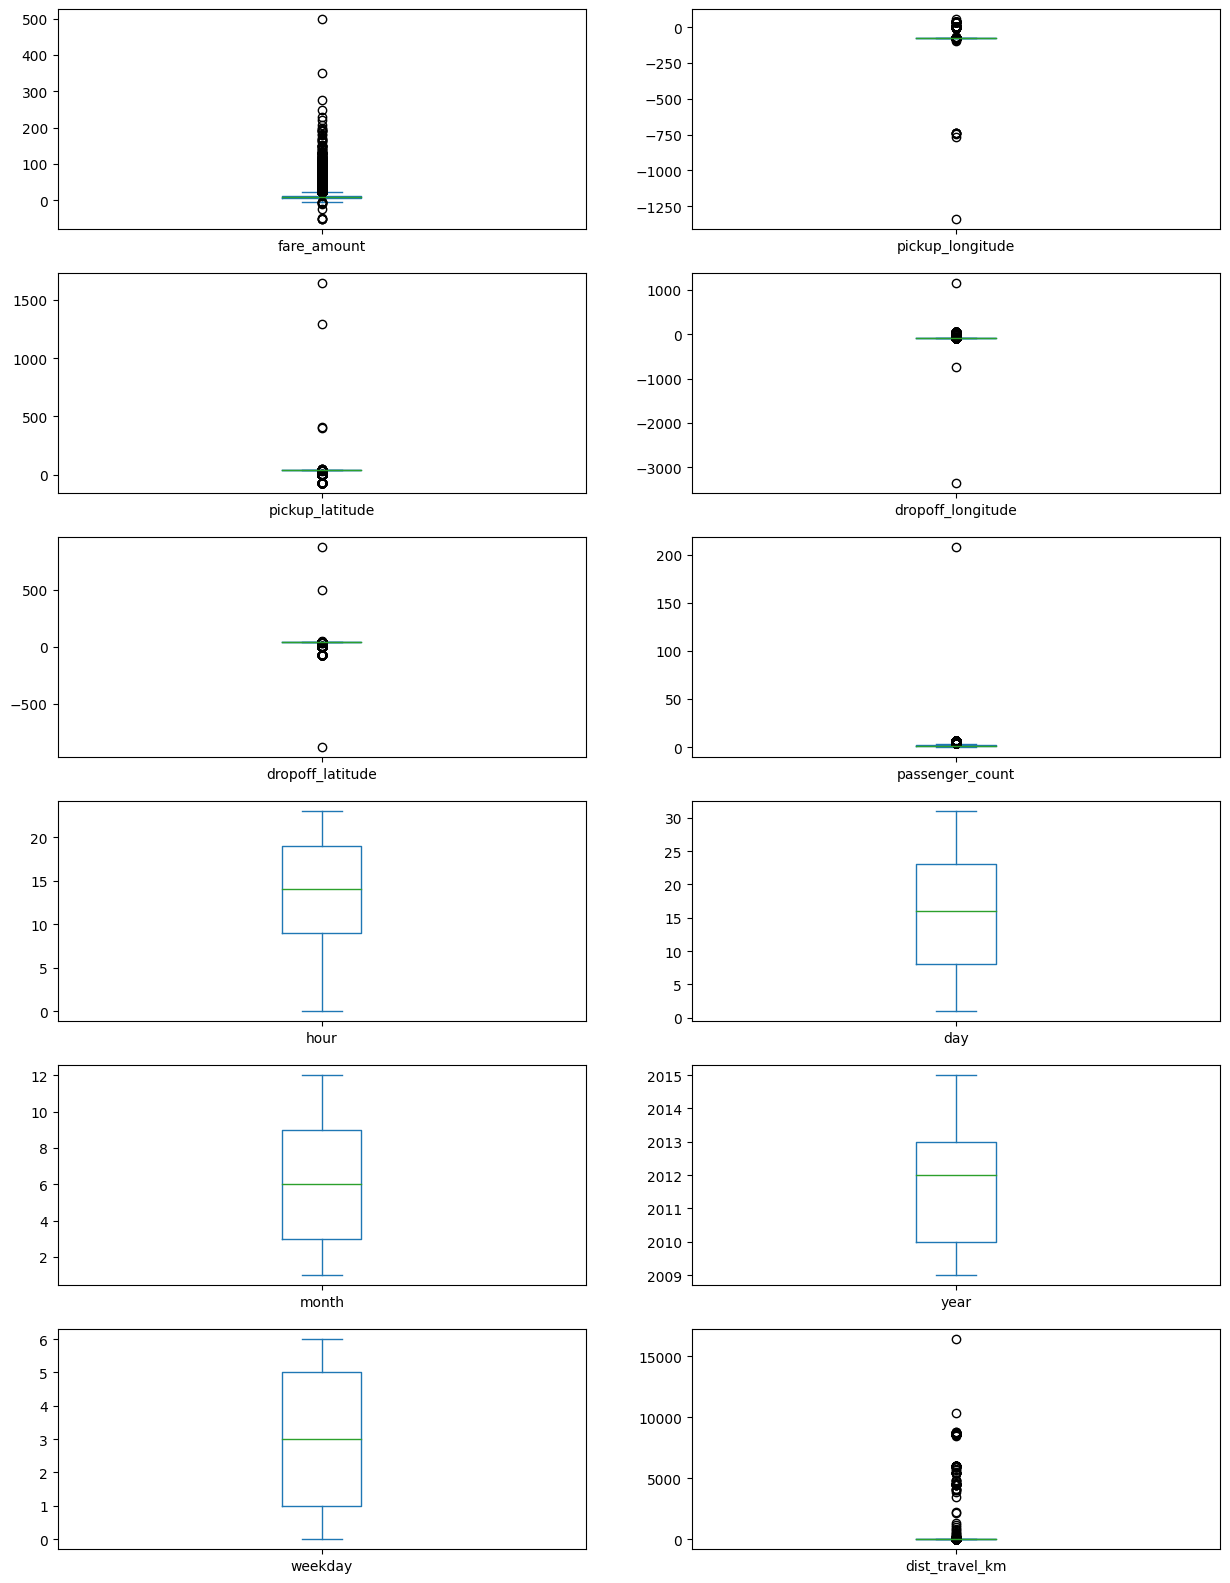

In [40]:
df.plot(kind = "box",subplots = True,layout = (6,2),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [41]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [42]:
df = treat_outliers_all(df , df.iloc[: , 0::])

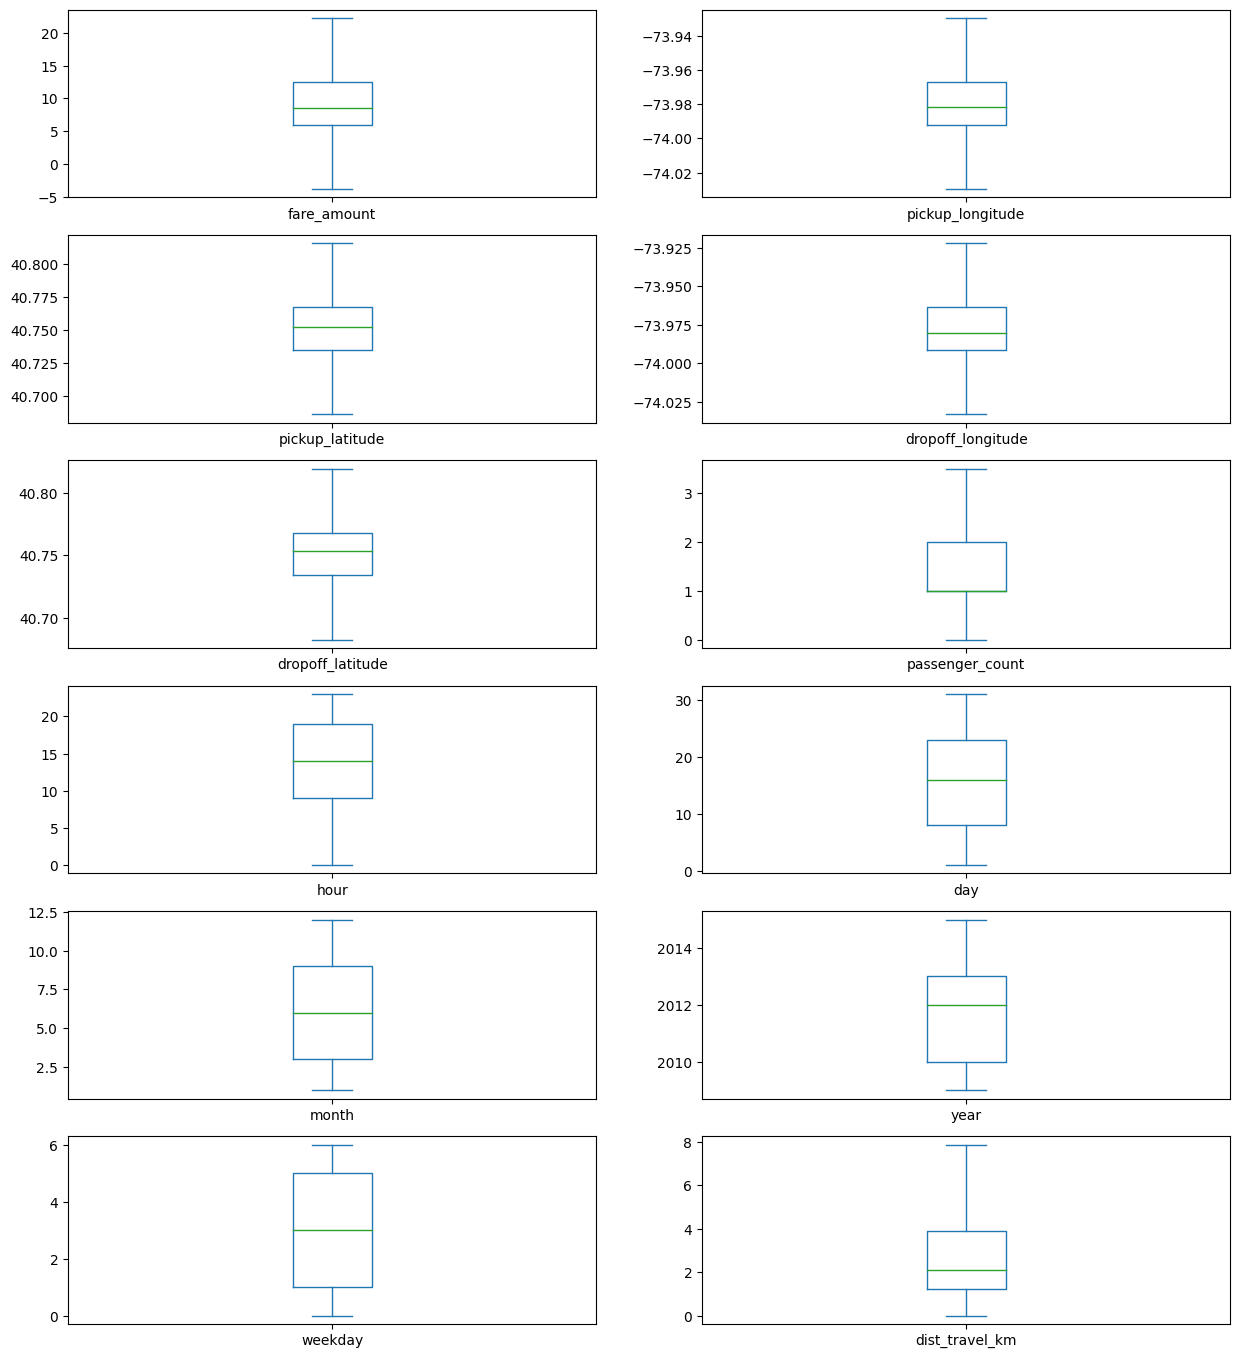

In [43]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) 
plt.show()

# 3) Check Correlation

In [44]:
corr=df.corr()

C:\Users\Shreeyash\AppData\Local\Temp\ipykernel_22112\1726683880.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


In [45]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday,dist_travel_km
fare_amount,1.000000,0.154069,-0.110842,0.218704,-0.125898,0.015778,-0.023623,0.004534,0.030817,0.141277,0.013652,0.844374
pickup_longitude,0.154069,1.000000,0.259497,0.425631,0.073290,-0.013213,0.011579,-0.003204,0.001169,0.010198,-0.024652,0.098094
pickup_latitude,-0.110842,0.259497,1.000000,0.048898,0.515714,-0.012889,0.029681,-0.001553,0.001562,-0.014243,-0.042310,-0.046812
dropoff_longitude,0.218704,0.425631,0.048898,1.000000,0.245627,-0.009325,-0.046578,-0.004027,0.002394,0.011355,-0.003349,0.186559
dropoff_latitude,-0.125898,0.073290,0.515714,0.245627,1.000000,-0.006308,0.019783,-0.003479,-0.001193,-0.009603,-0.031919,-0.038900
passenger_count,0.015778,-0.013213,-0.012889,-0.009325,-0.006308,1.000000,0.020274,0.002712,0.010351,-0.009749,0.048550,0.009709
hour,-0.023623,0.011579,0.029681,-0.046578,0.019783,0.020274,1.000000,0.004677,-0.003926,0.002156,-0.086947,-0.038366
day,0.004534,-0.003204,-0.001553,-0.004027,-0.003479,0.002712,0.004677,1.000000,-0.017360,-0.012170,0.005617,0.003062
month,0.030817,0.001169,0.001562,0.002394,-0.001193,0.010351,-0.003926,-0.017360,1.000000,-0.115859,-0.008786,0.011628
year,0.141277,0.010198,-0.014243,0.011355,-0.009603,-0.009749,0.002156,-0.012170,-0.115859,1.000000,0.006113,0.024278


<Axes: >

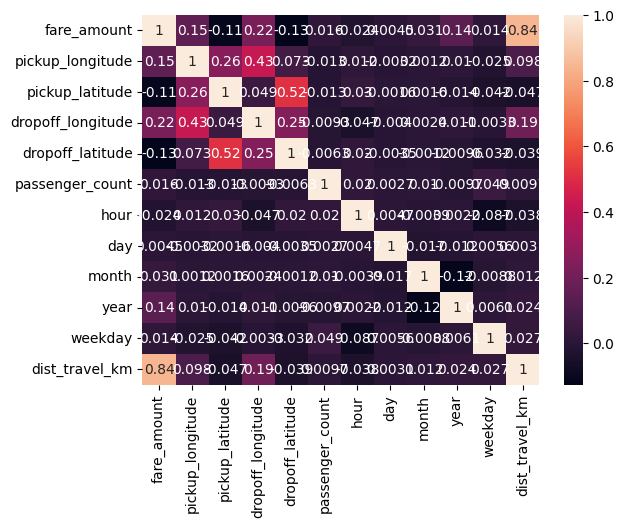

In [46]:
sns.heatmap(corr,annot=True)

# 4) Linear & Random Forest Regression

In [48]:
df_x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','weekday','dist_travel_km']]
df_y = df['fare_amount']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=1)

In [50]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday,dist_travel_km
0,7.50,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683323
1,7.70,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457590
2,12.90,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036377
3,5.30,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661683
4,16.00,2014-08-28 17:47:00+00:00,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1.0,10,28,10,2012,6,0.112210
199996,7.50,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1.0,1,14,3,2014,4,1.875050
199997,22.25,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.922034,40.692588,2.0,0,29,6,2009,0,7.865286
199998,14.50,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1.0,14,20,5,2015,2,3.539715


In [51]:
from sklearn.linear_model import LinearRegression
# linear regression model
reg = LinearRegression()
# Train the model 
reg.fit(x_train, y_train)

LinearRegression()

In [52]:
y_pred_lin=reg.predict(x_test)
print(y_pred_lin)

[ 6.2761843   5.09988121  9.43640959 ... 11.07661434 12.15390374
 11.41498106]


In [53]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestRegressor()

In [54]:
y_pred_rf=rf.predict(x_test)
print(y_pred_rf)

[ 5.218   5.923   9.555  ... 11.0375 11.384  13.821 ]


# 5) R2,RMSE Score

In [55]:
cols = ['Model', 'RMSE', 'R-Squared']
result_tabulation = pd.DataFrame(columns = cols)

In [56]:
from sklearn import metrics 
from sklearn.metrics import r2_score 

reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin))
reg_squared = r2_score(y_test, y_pred_lin)

full_metrics = pd.Series({'Model': "Linear Regression", 'RMSE' : reg_RMSE, 'R-Squared' : reg_squared})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(full_metrics, ignore_index = True)

# print the result table
result_tabulation

C:\Users\Shreeyash\AppData\Local\Temp\ipykernel_22112\2675079331.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(full_metrics, ignore_index = True)


,Model,RMSE,R-Squared
0,Linear Regression,2.703956,0.753906


In [57]:
rf_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
rf_squared = r2_score(y_test, y_pred_rf)


full_metrics = pd.Series({'Model': "Random Forest ", 'RMSE':rf_RMSE, 'R-Squared': rf_squared})
# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(full_metrics, ignore_index = True)

# print the result table
result_tabulation

C:\Users\Shreeyash\AppData\Local\Temp\ipykernel_22112\497369930.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(full_metrics, ignore_index = True)


,Model,RMSE,R-Squared
0,Linear Regression,2.703956,0.753906
1,Random Forest,2.363274,0.812012
